In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [2]:
df = pd.read_csv('wines.csv')

display(df.info())
display(df.head())
display(df.describe())

display(df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280-OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


None

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


2    71
1    59
3    48
Name: Class, dtype: int64

In [3]:
# Rescale all the features using either MinMaxScaler or StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(df.drop('Class', axis=1).values)
display(X.shape)

# onehot encoding y
from keras.utils.np_utils import to_categorical
y = pd.get_dummies(df['Class']).values

display(y.shape)

(178, 13)

Using TensorFlow backend.


(178, 3)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, random_state=42)

In [5]:
# Build a deep model with at least 1 hidden layer to classify the data

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

K.clear_session()

model = Sequential()

model.add(Dense(8, input_shape=(13,), activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))

# Output layer
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.1),
              'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(
    X_train, y_train,
    epochs=20, validation_split=0.2, verbose=0)

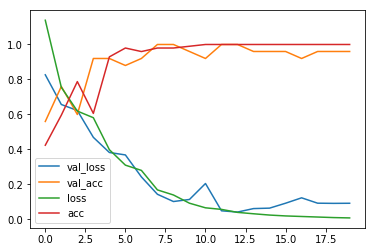

In [7]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

In [8]:
result = model.evaluate(X_test, y_test)

print("Test accuracy: {:3.1f} %".format(result[1]*100))

54/54 [==============================] - 0s 439us/step
Test accuracy: 100.0 %


### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Function like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [9]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

K.clear_session()

model = Sequential()

model.add(Dense(8, input_shape=(13,), kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))

# Output layer
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(
    X_train, y_train,
    epochs=20, validation_split=0.2, verbose=0)

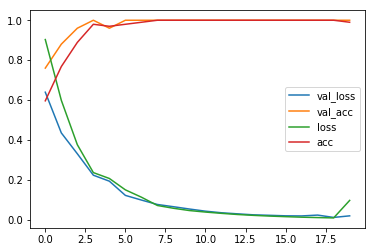

In [11]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

In [12]:
result = model.evaluate(X_test, y_test)

print("Test accuracy: {:3.1f} %".format(result[1]*100))

54/54 [==============================] - 0s 79us/step
Test accuracy: 96.3 %


In [13]:
# Define a Feature Function like we did above between the input of the 1st layer and the output of the 3rd layer
inp = model.layers[0].input
out = model.layers[2].output

features_function = K.function([inp], [out])

In [14]:
# Calculate the features and plot them on a 2-dimensional scatter plot
features = features_function([X])[0]
features.shape

(178, 2)

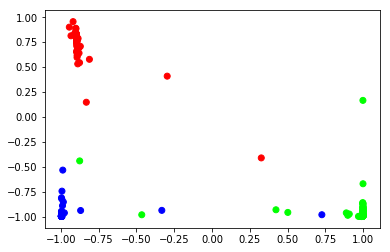

In [15]:
plt.scatter(
    features[:, 0], features[:, 1],
    c=y)

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [16]:
from keras.layers import Input
from keras.models import Model

# define an input layer called inputs
inputs = Input(shape=(13,))

# define two hidden layers as before, one with 8 nodes, one with 5 nodes
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)

# define a second_to_last layer with 2 nodes
second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)

# define an output layer with 3 nodes
outputs = Dense(3, activation='softmax')(second_to_last)

# create a model that connect input and output
model = Model(
    inputs=inputs,
    outputs=outputs)

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(
    X_train, y_train,
    batch_size=16, epochs=20, validation_split=0.2, verbose=0)

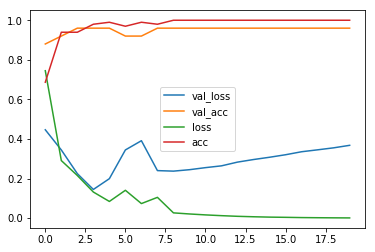

In [18]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

In [19]:
result = model.evaluate(X_test, y_test)

print("Test accuracy: {:3.1f} %".format(result[1]*100))

54/54 [==============================] - 0s 160us/step
Test accuracy: 98.1 %


In [20]:
# define a function between inputs and second_to_last layer
features_function = K.function([inputs], [second_to_last])

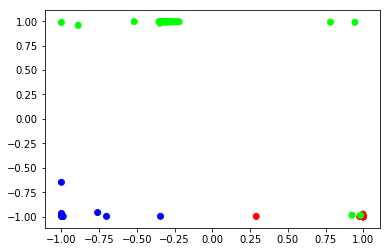

In [21]:
# recalculate the features and plot them
features = features_function([X])[0]

plt.scatter(
    features[:, 0], features[:, 1],
    c=y)

## Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [22]:
# Use the EarlyStopping callback to stop your training if the val_loss doesn't improve
from keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss', min_delta=0,
    patience=1, verbose=1, mode='auto')

In [23]:
# Use the ModelCheckpoint callback to save the trained model to disk once training is finished
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(
    filepath="/tmp/weights.hdf5",
    verbose=0, save_best_only=True)

In [24]:
# Use the TensorBoard callback to output your training information to a /tmp/ subdirectory
from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='/tmp/udemy/tensorboard/')

In [25]:
# Model

from keras.layers import Input
from keras.models import Model

# define an input layer called inputs
inputs = Input(shape=(13,))

# define two hidden layers as before, one with 8 nodes, one with 5 nodes
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)

# define a second_to_last layer with 2 nodes
second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)

# define an output layer with 3 nodes
outputs = Dense(3, activation='softmax')(second_to_last)

# create a model that connect input and output
model = Model(
    inputs=inputs,
    outputs=outputs)

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit
history = model.fit(
    X_train, y_train,
    batch_size=32, epochs=20, verbose=0,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer, earlystopper, tensorboard])

Epoch 00009: early stopping


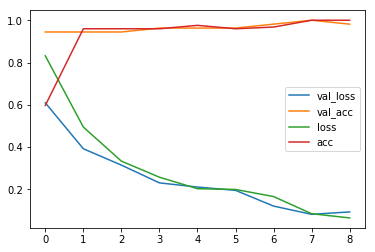

In [27]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();